### Step 0: Importing necessary libraries

In [139]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import tensorflow as tf
import keras
from keras import layers

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Step 1: Reading my dataset


For this excercise I am using a diabetes dataset. The aim will be to decide whether or not the applicant has diabetes. The data has the person's blood pressure, cholesterin, BMI, etc.

In [140]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          12999 non-null  float64
 1   HighBP                12999 non-null  float64
 2   HighChol              12999 non-null  float64
 3   CholCheck             12999 non-null  float64
 4   BMI                   12999 non-null  float64
 5   Smoker                12999 non-null  float64
 6   Stroke                12999 non-null  float64
 7   HeartDiseaseorAttack  12999 non-null  float64
 8   PhysActivity          12999 non-null  float64
 9   Fruits                12999 non-null  float64
 10  Veggies               12999 non-null  float64
 11  HvyAlcoholConsump     12999 non-null  float64
 12  AnyHealthcare         12999 non-null  float64
 13  NoDocbcCost           12999 non-null  float64
 14  GenHlth               12999 non-null  float64
 15  MentHlth           

There are no categorical columns in the dataset.

### Step 2: Cleaning up the dataset

We modify our target by replacing the third option, giving only two options

In [142]:
df["Diabetes_012"] = df["Diabetes_012"].replace({0.0: 0.0 ,1.0: 1.0, 2.0: 1.0})
df.head()
df["Diabetes_012"].unique()

array([0., 1.])

### Step 3: Train/test/validation split
I isolate the target column from the features, then encode it into a TensorFlow/Keras categorical format.

In [143]:
df['Diabetes_012'] = df['Diabetes_012'].replace({
     0.0: "0: No diabetes",
     1.0: "1: Diabetes",
 })

X = df.drop(columns="Diabetes_012")
y_temp = df["Diabetes_012"]

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)
categories = list(le.classes_)
categories

['0: No diabetes', '1: Diabetes']

Now we can do the train- test- validation split.

In [144]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### Step 4: Creating the neural network structure
Here I'm using Keras Dense layers to create neural network structure. The input layer equals the number of non-target features, and the output layer contains three nodes (no diabetes/prediabetes/diabetes).

In [145]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(12, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.2)),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(18, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 21)             │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 12)             │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 18)             │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │            38 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 962 (3.76 KB)

 Trainable params: 920 (3.59 KB)

 Non-trainable params: 42 (168.00 B)

### Step 5: Fitting data into the model
Now i fit my dataset to the model.

In [146]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7851 - loss: 6.1025 - val_accuracy: 0.8164 - val_loss: 1.6807
Epoch 2/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.6713 - val_accuracy: 0.8164 - val_loss: 0.4763
Epoch 3/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8211 - loss: 0.4620 - val_accuracy: 0.8164 - val_loss: 0.4437
Epoch 4/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.4566 - val_accuracy: 0.8215 - val_loss: 0.4366
Epoch 5/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8235 - loss: 0.4532 - val_accuracy: 0.8262 - val_loss: 0.4400
Epoch 6/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8203 - loss: 0.4514 - val_accuracy: 0.8185 - val_loss: 0.4505
Epoch 7/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.4535 - val_accuracy: 0.8169 - val_loss: 0.4455
Epoch 8/500
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8249 - loss: 0.4501 - val_accu

We can se how the training and validation loss changed during the training.

<Axes: >

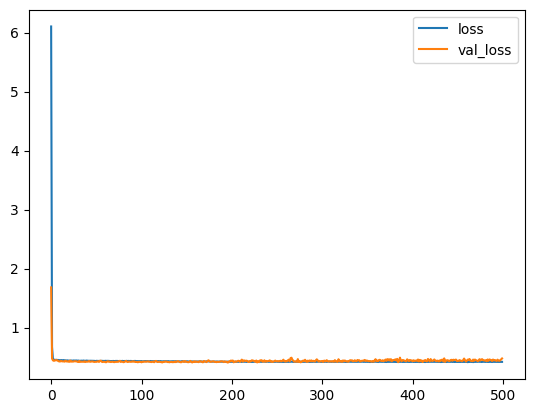

In [147]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

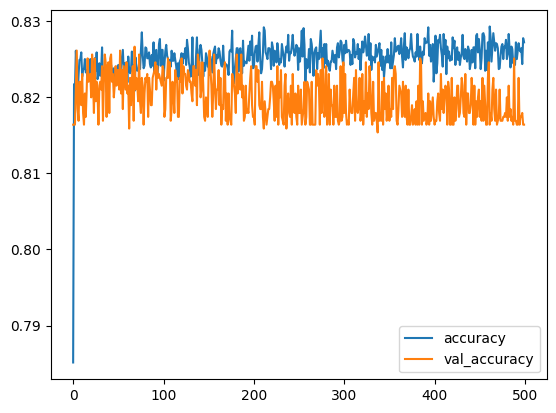

In [148]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [149]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.49355390667915344, 0.8133333325386047]

Train data evaluation:
[0.4785095751285553, 0.8218485713005066]


In [150]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Step 6: Metrics

Text(50.72222222222221, 0.5, 'True values')

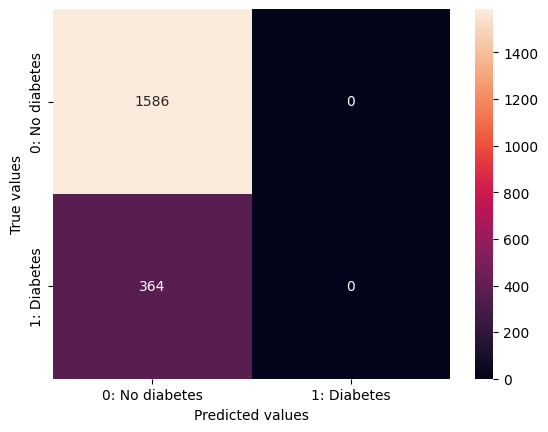

In [151]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [152]:
print(classification_report(y_test, test_predictions, target_names=categories))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

                precision    recall  f1-score   support

0: No diabetes       0.81      1.00      0.90      1586
   1: Diabetes       0.00      0.00      0.00       364

      accuracy                           0.81      1950
     macro avg       0.41      0.50      0.45      1950
  weighted avg       0.66      0.81      0.73      1950


Model overall accuracy: 81.33%


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [153]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step


0.7981409147110028

### Step 7: trying out the model with imaginary new values

In [154]:
tester_row_approve = {
  'HighBP' : 1,
  'HighChol': 1,
  'CholCheck': 0,
  'BMI': 50.0, 
  'Smoker': 1, 
  'Stroke': 1, 
  'HeartDiseaseorAttack': 1,
  'PhysActivity': 0, 
  'Fruits': 0,
  'Veggies': 0, 
  'HvyAlcoholConsump': 1,
  'AnyHealthcare': 0,
  'NoDocbcCost': 1,
  'GenHlth': 5,
  'MentHlth': 30,
  'PhysHlth': 30,
  'DiffWalk': 1,
  'Sex': 1,
  'Age': 8,
  'Education': 1,
  'Income': 1,
}

tester_row_approve = pd.DataFrame([tester_row_approve])
result = model.predict(tester_row_approve)[0]
result_text = categories[np.argmax(result)]

np.set_printoptions(precision=9, suppress=True)

print(f"Predicted result: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted result: 0: No diabetes

Probabilities by class:
['0: No diabetes', '1: Diabetes']
[0.72013634 0.2798637 ]


In [155]:
tester_row_approve = {
  'HighBP' : 0,
  'HighChol': 0,
  'CholCheck': 1,
  'BMI': 25.0, 
  'Smoker': 0, 
  'Stroke': 0, 
  'HeartDiseaseorAttack': 0,
  'PhysActivity': 1, 
  'Fruits': 1,
  'Veggies': 1, 
  'HvyAlcoholConsump': 0,
  'AnyHealthcare': 1,
  'NoDocbcCost': 0,
  'GenHlth': 1,
  'MentHlth': 0,
  'PhysHlth': 0,
  'DiffWalk': 0,
  'Sex': 0,
  'Age': 3,
  'Education': 5,
  'Income': 5,
}

tester_row_approve = pd.DataFrame([tester_row_approve])
result = model.predict(tester_row_approve)[0]
result_text = categories[np.argmax(result)]

np.set_printoptions(precision=9, suppress=True)

print(f"Predicted result: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted result: 0: No diabetes

Probabilities by class:
['0: No diabetes', '1: Diabetes']
[0.9897077   0.010292289]


Text(50.72222222222221, 0.5, 'True values')

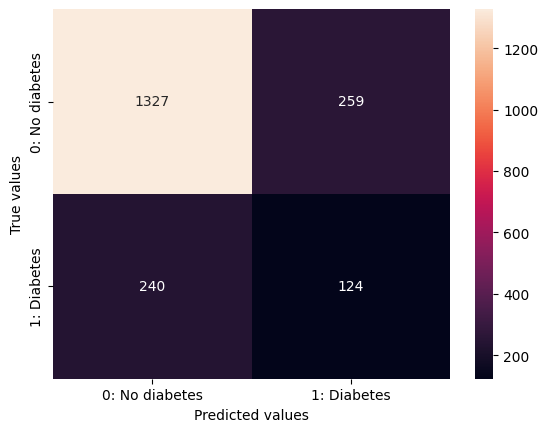

In [156]:
from sklearn.tree import DecisionTreeClassifier
classicmodel = DecisionTreeClassifier()

classicmodel.fit(X_train, y_train)
y_pred_classic = classicmodel.predict(X_test)

y_pred_classic = np.argmax(y_pred_classic, axis=1)

sns.heatmap(confusion_matrix(y_test, y_pred_classic), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted values')
plt.ylabel('True values')


In [157]:
print(classification_report(y_test, y_pred_classic, target_names=categories))

acc = accuracy_score(y_test, y_pred_classic)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

                precision    recall  f1-score   support

0: No diabetes       0.85      0.84      0.84      1586
   1: Diabetes       0.32      0.34      0.33       364

      accuracy                           0.74      1950
     macro avg       0.59      0.59      0.59      1950
  weighted avg       0.75      0.74      0.75      1950


Model overall accuracy: 74.41%


In [158]:
roc_auc_score(y, classicmodel.predict(X), multi_class="ovr")

0.8743568851169874